In [285]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:99% !important; }</style>"))

#Install a pip package in the current Jupyter kernel
#import sys
#!{sys.executable} -m pip install sympy

In [286]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>The raw code for this Python notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [287]:
import numpy as np
import matplotlib.pyplot as plt
import math
import ipywidgets as widgets
from sympy import S, symbols, printing
import pandas as pd
data = pd.read_csv("covid19.csv")

In [288]:
countries = pd.DataFrame(data['Country/Region'])
countries = countries.groupby('Country/Region').count()
countries_list = countries.index.tolist()

In [367]:
if 'country_choice' not in locals():
    country_choice = widgets.Select(
        options = countries_list,
        value='Afghanistan',
        rows=15,
        description='Country',
        disabled=False,
        continuous_update=True
    )


dof = widgets.IntSlider(
    description = 'Degree of fit',
    max = 8,
    min = 1,
    value = 4
)

    
display(country_choice)

display(dof)


HTML('''<script> </script> <form action="javascript:IPython.notebook.execute_cells_below()"><input type="submit" id="toggleButton" value="Run Analysis"></form>''')

Select(description='Country', index=109, options=('Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Argentina',…

IntSlider(value=4, description='Degree of fit', max=8, min=1)

In [368]:
target = country_choice.value
target_data = data[(data['Country/Region'] == target)]

In [369]:
target_data.drop(columns = ['Province/State', 'Lat', 'Long', 'Last_Update_Date', 'Difference'], inplace = True)


In [370]:
target_confirmed = target_data[(target_data['Case_Type']== 'Confirmed')]
target_confirmed = target_confirmed.groupby('Date').sum()
target_confirmed = target_confirmed[(target_confirmed['Cases']> 0)]
target_confirmed.reset_index(inplace = True)
#target_confirmed.drop(columns = 'index', inplace = True)

In [371]:
x = target_confirmed.index.to_numpy()
y = target_confirmed['Cases'].to_numpy()

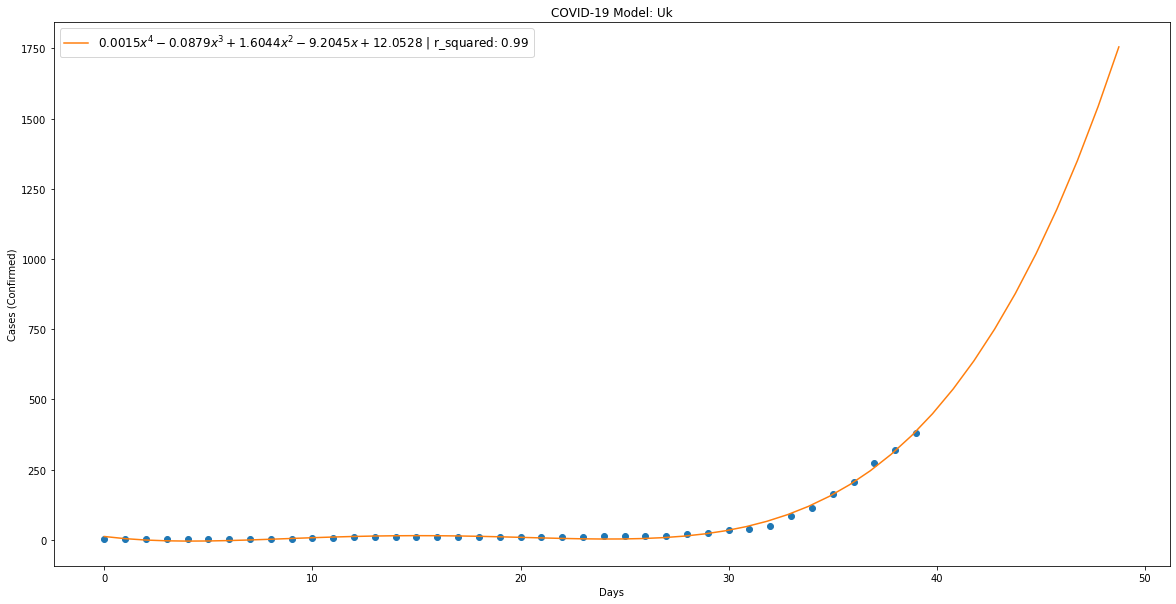

In [372]:
#set degree of fit, you can alter this and just rerun this section if you want to check different degrees of fit
degree_of_fit = dof.value

# polyfit to build best fit formula
c = np.polyfit(x,y, degree_of_fit)
f = np.poly1d(c)

# Calculate average to inform later forecasting
x_avg = np.average(x)

# Build x values for line of best fit (zero to max + half the average)
x_new = np.linspace(0, x[-1]+(x_avg/2), 50)
#x_new = np.linspace(0,70,50)

# Build new y values from model
y_f = f(x_new)

# r-squared
# fit values, and mean
yhat = f(x)                      # or [p(z) for z in x]
ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
r_sq = ssreg / sstot


plt.figure(figsize=(20,10))

# plot real values
plt.plot(x,y, 'o')
plt.xlabel('Days')
plt.ylabel('Cases (Confirmed)')


# Build formula for printing on the graph
z = symbols("x")

# If terms are missing, alter the formatting below to allow more decimal places
# .            > < This one on the line below
poly = sum(S("{:6.4f}".format(v))*z**i for i, v in enumerate(c[::-1]))
eq_latex = printing.latex(poly)

# Plot the best fit line with the label being the formula and r squared
plt.plot(x_new, y_f, label="${}$".format(eq_latex) + ' | r_squared: ' + "{:1.2f}".format(r_sq) )
plt.title('COVID-19 Model: ' + target.capitalize())


plt.legend(fontsize = 'large')
plt.show()